<a href="https://colab.research.google.com/github/samettyldrm/Global-AI-Hub-Projects/blob/main/End_to_End_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

## Loading Dataset

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [2]:
dataset = pd.read_csv("insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


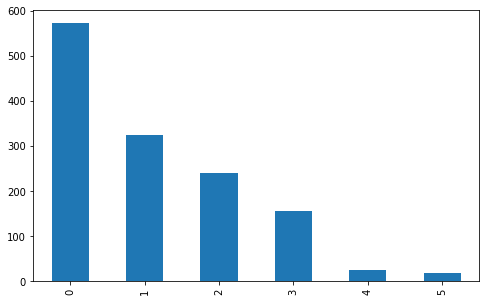

In [6]:
plt.figure(figsize = (8,5))
df["children"].value_counts().plot.bar();

In [7]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

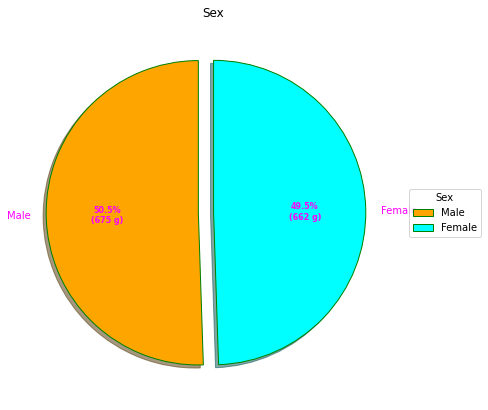

In [9]:
fig, ax = plt.subplots(figsize = (10,7))

sex = ["Male", "Female"]

data = list(df["sex"].value_counts().values)

explode = (0.1, 0.0)

colors = ("orange", "cyan")

wp = {"linewidth" : 1, "edgecolor": "green"}

def func(pct, allvalues):
  absolute = int(pct/100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct,data),
                                  explode = explode,
                                  labels = sex,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color = "magenta"))
  
ax.legend(wedges, sex, title = "Sex", loc= "center left", bbox_to_anchor = (1,0,0.5,1))
plt.setp(autotexts, size = 8, weight= "bold")
ax.set_title("Sex")

plt.show()

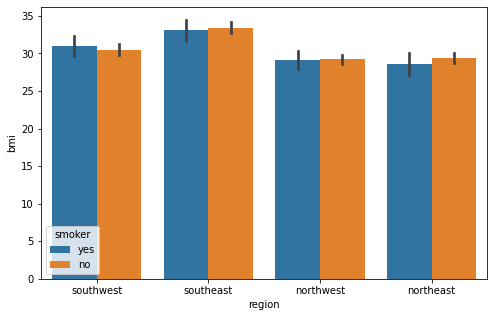

In [10]:
# To see which state has the most smoker
plt.figure(figsize = (8,5))

sns.barplot(x= "region", y= "bmi", hue= "smoker",  data= df);

## Preprocessing

Dealing With Categorical Attributes

### 1. Label Encoding # Etiket olarak kodla.

In [11]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [12]:
label_encoding("smoker")

In [13]:
label_encoding("sex")

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Eğer region'a label encoding uygularsak 0-1-2-3 olarak değiştirecek. Burada children da 0-1-2-3, yani artan bir değişken. Adet belirtiyor. Region'u da aynı şekilde yaparsak etkiler. Kategorik değişken değil de devamlı bir değişken olarak algılar. 0 - 1'ler de normalization sonrasında 0-1 olarak kalır.

### 2. One - Hot Encoding

In [15]:
one_hot = pd.get_dummies(df["region"]) #one-hot yapmak istediğimiz sütunları buraya ekliyoruz.
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [16]:
df = pd.concat([df, one_hot], axis= 1) #Birleştirme işlemi yapıyoruz.
df.drop("region", axis=1, inplace= True )
df.head() #now our data is all numerical

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Splitting Dataset

In [17]:
x = df.drop("charges", axis= 1)
y = df["charges"] 

In [19]:
x.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [20]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Feature Scaling

Normalization and Standardization

In [21]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [23]:
print(f"""
Shape of x Train: {x_train.shape}
Shape of y Train: {y_train.shape}
Shape of x Test: {x_test.shape}
Shape of y Test: {y_test.shape}
""")


Shape of x Train: (1070, 9)
Shape of y Train: (1070,)
Shape of x Test: (268, 9)
Shape of y Test: (268,)



### Model Selection

In [55]:
models = {"linreg" : LinearRegression(),
          "DecTree" : DecisionTreeRegressor(),
          "RandForest" : RandomForestRegressor(),
          "SVM" : SVR()}
          

def scores(models, x_train, y_train):
  model_scores = {}

  for name, model in models.items():
    print(name)
    model_scores[name] = cross_val_score(model, x_train, y_train, scoring = "neg_mean_squared_error", cv= 10)

  return model_scores

In [61]:
model_scores = scores(models, x_train, y_train)
model_scores

linreg
DecTree
RandForest
SVM


{'linreg': array([-36935397.24633981, -43307871.90469339, -27392943.33594101,
        -36545076.53517248, -34064321.21101744, -37545462.85261907,
        -53003844.65025207, -39666927.56171686, -38357145.09175086,
        -32042446.75311643]),
 'DecTree': array([-41434836.85141903, -44740448.40944486, -53622899.57072708,
        -46405796.3309211 , -44639692.63631778, -42125701.41403511,
        -50564440.35298277, -51450304.48282622, -41369666.62215082,
        -29662442.15190667]),
 'RandForest': array([-22524861.31425713, -27426429.69094618, -14915955.36053921,
        -20044510.04098495, -27374735.59788891, -23812518.12408999,
        -31712001.77086937, -29092216.70696972, -25773203.93516767,
        -21892606.84574764]),
 'SVM': array([-1.56939674e+08, -1.55688887e+08, -1.64428208e+08, -2.10106259e+08,
        -1.69069136e+08, -1.08552023e+08, -1.51800872e+08, -1.47702857e+08,
        -1.67329025e+08, -1.50282422e+08])}

In [68]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores : {scores}
  Mean : {scores.mean()}
  Standart Daviation : {scores.std()}
  """)

In [71]:
score_display(model_scores["linreg"])


  RMSE Scores : [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean : 6133.376271799343
  Standart Daviation : 517.5318567882914
  


In [74]:
score_display(model_scores["DecTree"])


  RMSE Scores : [6436.98973523 6688.83012263 7322.76584159 6812.17999842 6681.29423363
 6490.43152757 7110.86776371 7172.88676077 6431.92557654 5446.32372816]
  Mean : 6659.449528824685
  Standart Daviation : 503.3436751463415
  


In [75]:
score_display(model_scores["RandForest"])


  RMSE Scores : [4746.03637937 5237.02488928 3862.11798895 4477.10956321 5232.08711681
 4879.80718104 5631.34102775 5393.7201176  5076.73161938 4678.95360586]
  Mean : 4921.492948922977
  Standart Daviation : 485.6038431144277
  


Random Forest'da normalization uygulamaya gerek yok. Uyguladığımız halde en iyi sonucu RF'da elde ettik.

In [76]:
score_display(model_scores["SVM"])


  RMSE Scores : [12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757]
  Mean : 12541.318099949585
  Standart Daviation : 951.4602172803403
  


Random Forest ile devam ediyoruz.

In [ ]:
RandForest = model_scores["RandForest"]

## Parameter Tuning

In [92]:
params = {"n_estimators" : [3,10,20,250,500],
          "n_jobs" : [2,3,4,10]}

#Add more parameters and try that way

In [93]:
grid_s = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring="neg_mean_squared_error")

In [94]:
grid_s.fit(x_train, y_train);

In [95]:
grid_s.best_params_

{'n_estimators': 500, 'n_jobs': 3}

In [97]:
for mean_score,params in zip((grid_s.cv_results_["mean_test_score"]),
                             (grid_s.cv_results_["params"])):
  print(np.sqrt(-mean_score), "          ", params)

5315.950359477705            {'n_estimators': 3, 'n_jobs': 2}
5614.795064067318            {'n_estimators': 3, 'n_jobs': 3}
5420.812001796903            {'n_estimators': 3, 'n_jobs': 4}
5692.400179589133            {'n_estimators': 3, 'n_jobs': 10}
5102.374809633067            {'n_estimators': 10, 'n_jobs': 2}
5140.596072957593            {'n_estimators': 10, 'n_jobs': 3}
5187.178303708616            {'n_estimators': 10, 'n_jobs': 4}
5240.227048089066            {'n_estimators': 10, 'n_jobs': 10}
4981.909836536547            {'n_estimators': 20, 'n_jobs': 2}
5034.794872402421            {'n_estimators': 20, 'n_jobs': 3}
4941.8961749239215            {'n_estimators': 20, 'n_jobs': 4}
5012.142146840293            {'n_estimators': 20, 'n_jobs': 10}
4918.828071978442            {'n_estimators': 250, 'n_jobs': 2}
4928.934574389023            {'n_estimators': 250, 'n_jobs': 3}
4918.918243638782            {'n_estimators': 250, 'n_jobs': 4}
4935.345620887663            {'n_estimators': 250, '

## Predicting

In [98]:
predictions = grid_s.best_estimator_.predict(x_test)

In [99]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [101]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                           "Predictions" : predictions[0:10]})

In [102]:
comparison

,Y Test,Predictions
0,9095.06825,10430.940600
1,5272.17580,5384.010654
2,29330.98315,28369.222324
3,9301.89355,11557.832108
4,33750.29180,34814.528638
5,4536.25900,9089.286363
6,2117.33885,2140.754474
7,14210.53595,14482.790276
8,3732.62510,5911.895389
9,10264.44210,11356.719743


## Evaluation

In [103]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test,preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Absolute Error: {rmse} \nR Squared Value: {r_squared} \n")

In [104]:
regression_evaluation(predictions)

Mean Absolute Error: 2533.381606492723 
Mean Squared Error: 20929008.91744109 
Root Mean Absolute Error: 4574.82337554589 
R Squared Value: 0.8651904674754132 



## Finding the Confidence Interval Of %95

In [106]:
from scipy import stats

confidence = 0.95
squared_errors = (predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([3640.636189  , 5348.25073966])